<a href="https://colab.research.google.com/github/davidrtorres/Deep_Learning/blob/main/Image_Classification_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using Machine Learning for Image Classification
In this notebook I'm going to build a Machine Learning model for image classification.  What is the difference between image segmentation and image classification?  By segmentation I am referring to semantic segmentation.  Image segmentation refers to every pixel classification.  Image classification refers to the entire picture classified as something, i.e. if you're working with images of infected cells or non-infected cells.  Here we're not dealing with pixel level information.  We're dealing with whole image level information, i.e., is this a dog or cat.  The entire image is classifed into one or the categories.  The label in image classification is not at the pixel level but at the image level.  There are binary classification or multi-classification problems, i.e., is this an image of a barn, airplan or cat.

I followed the Youtube Series https://www.youtube.com/watch?v=nK-2k_ENgEc&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=85 in prepaing this notebook.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import cv2
import os

### Put Image Folders into Train, Validation and Test Sets
The image folder consists of 2 subfolders for airplanes and cars.  The task for this section was how to take the subfolders and split then into train, validation and test sets.  I need train and validation sets so that labels can be created. 

In [ ]:
!pip install split-folders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

The train set is used to train the model and to update the weights.  The validation data is used as part of the training but only to validate after each iteration.  Test data is never used as part of the training process.

https://www.youtube.com/watch?v=C6wbr1jJvVs

In [ ]:
# input_folder = '/content/drive/MyDrive/datasets/air_car2/'
# # #testing, (20)validation, (test)testing
# splitfolders.ratio(input_folder, output='/content/drive/MyDrive/datasets/air_car2_folder/',seed=42, ratio=(.7,.3),group_prefix=None) #ratio=(.7,.2,.1)

In [ ]:
print(os.listdir('/content/drive/MyDrive/datasets/air_car2_folder/'))

['train', 'val', 'test']


In [ ]:
# file = '/content/drive/MyDrive/datasets/cell_images_folder/train/'
# for f in glob.glob(file + "/*.JPG"):
#   print(f)

### Read the Images
The for loops allows me to iterate through every image in the train folder.  I ran the for loop on the train folder and the directory shows that there are 2 subfolders (airplane and car) in the train folder.  With function .split() I created a label for each image based on the folder it's in. 
When you load the images they usually come in different sizes so I need to resize the images for processing purposes.  

In [ ]:
SIZE = 128
train_images = []
train_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/datasets/air_car2_folder/train/*"):
  #create label
  label = directory_path.split("/")[-1]
  print(label)
  #print(directory_path)
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    #print(img_path)
    #read image as color meaning 3 channels
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    #resize images
    img = cv2.resize(img, (SIZE,SIZE))
    #append images
    train_images.append(img)
    train_labels.append(label)
#convert list to numpy array
train_images = np.array(train_images)
train_labels  = np.array(train_labels)

airplane
car


In [ ]:
train_images

array([[[[241, 255, 255],
         [177, 213, 207],
         [166, 214, 205],
         ...,
         [191, 229, 211],
         [193, 229, 213],
         [194, 229, 216]],

        [[241, 255, 255],
         [177, 213, 207],
         [166, 214, 205],
         ...,
         [191, 229, 211],
         [192, 228, 212],
         [193, 228, 215]],

        [[240, 255, 255],
         [176, 212, 206],
         [165, 213, 204],
         ...,
         [189, 228, 212],
         [190, 226, 212],
         [191, 227, 215]],

        ...,

        [[247, 250, 253],
         [  4,   7,  23],
         [  1,   2,  23],
         ...,
         [ 10,  30,  34],
         [ 14,  39,  43],
         [ 12,  41,  42]],

        [[249, 251, 255],
         [ 10,  11,  29],
         [  8,   8,  32],
         ...,
         [ 16,  37,  42],
         [ 22,  49,  53],
         [ 18,  48,  49]],

        [[251, 253, 255],
         [ 21,  21,  39],
         [ 21,  20,  45],
         ...,
         [ 13,  37,  41],
        

In [ ]:
train_labels

array(['airplane', 'airplane', 'airplane', 'airplane', 'airplane',
       'airplane', 'airplane', 'airplane', 'airplane', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car'], dtype='<U8')

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(17, 128, 128, 3)
(17,)


In [ ]:
test_images = []
test_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/datasets/air_car2_folder/val/*"):
  flower_label = directory_path.split("/")[-1]
  print(flower_label)
  #print(directory_path)
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    #print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))

    test_images.append(img)
    test_labels.append(flower_label)

test_images = np.array(test_images)
test_labels  = np.array(test_labels)

airplane
car


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(8, 128, 128, 3)
(8,)


In [ ]:
test_labels

array(['airplane', 'airplane', 'airplane', 'airplane', 'car', 'car',
       'car', 'car'], dtype='<U8')

### Preprocessing
The label has the categories airplane and cr which need to be converted to 0 and 1. 

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
train_labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train, X_test,y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
#X_train, X_test = X_train / 255.0, X_test/255.0

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 128, 128, 3)
(17,)
(8, 128, 128, 3)
(8,)


### Feature Extracting
The function enables you to go through each image and apply several filters.  We can then capture the responses and append them to a Pandas dataframe.  I will do this for both the training and testing images. We will extract features from the images by applying filters to them.  The extracted images or filtered images you can extract filters are features I'll use as input to the Random Forest Classifier I'm going to build. <br>
Pixel values are the first feature added to the dataframe.

In [ ]:
from skimage.filters import roberts,sobel, scharr, prewitt

In [ ]:
def feature_extractor(dataset):
    X_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(X_train.shape[0]):

        df = pd.DataFrame()

        input_img = X_train[image,:,:,:]
        img = input_img

        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values
        #Generate Gabor filters
        num=1
        kernels = []
        for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with values of 1 and 3
                lamda =  np.pi /4   #Range of wavelengths
                gamma = 0.5   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                #print(gabor_label)
                #kernal size
                ksize=9
                #generate a Gabor kernal with each parameter 
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #apply kernal to image/filter the image and add values to a new column
                #when you get kernal apply it to image2
                #the filtered image is 2D 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                #reshape filtered image/fimg to 1D
                filtered_img = fimg.reshape(-1)
                #add new column to dataframe
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                

        #Other filter responses
        # edges = cv2.Canny(img, 100,200) #minimum and max value
        # edges1 = edges.reshape(-1)
        # df['Canny_Edge'] = edges1

        # edge_sobel = sobel(img) #minimum and max value
        # edge_sobel1 = sobel.reshape(-1)
        # df['Sobel'] = edge_sobel1

        image_dataset = image_dataset.append(df)
    return image_dataset
 

In [ ]:
image_features = feature_extractor(X_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [ ]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (X_train.shape[0],-1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_for_RF, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_features = feature_extractor(X_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (X_test.shape[0],-1))

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [ ]:
test_prediction = rf_model.predict(test_for_RF)
test_prediction = le.inverse_transform(test_prediction)

### Metrics

In [ ]:
from sklearn import metrics

In [ ]:
print('Accuracy:', metrics.accuracy_score(test_labels, test_prediction))

Accuracy: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(test_labels, test_prediction)

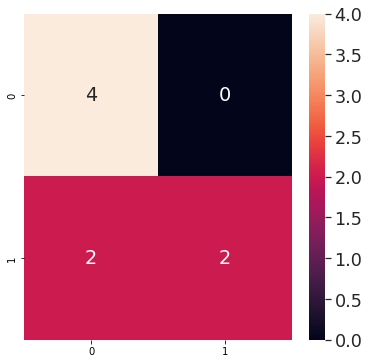

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)